In [35]:
import math
import warnings

%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

# Loading Data

In [15]:
df = pd.read_excel("/Users/saurabh/Documents/PythonData/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls", encoding = "ISO-8859-1", skiprows=4)

In [16]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
City                                    351 non-null object
Population                              348 non-null float64
Violent
crime                           348 non-null float64
Murder and
nonnegligent
manslaughter    348 non-null float64
Rape
(revised
definition)1              0 non-null float64
Rape
(legacy
definition)2               348 non-null float64
Robbery                                 348 non-null float64
Aggravated
assault                      348 non-null float64
Property
crime                          348 non-null float64
Burglary                                348 non-null float64
Larceny-
theft                          348 non-null float64
Motor
vehicle
theft                     348 non-null float64
Arson3                                  187 non-null float64
dtypes: float64(12), object(1)
memory usage: 35.7+ KB


In [18]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,348.000,348.000,348.000,0.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,187.000
mean,40037.632,201.595,1.566,nan,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
std,450037.368,2815.269,18.304,nan,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,10.693
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3003.000,2.000,0.000,nan,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000
50%,7233.500,6.000,0.000,nan,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000
75%,18427.500,22.000,0.000,nan,2.000,5.000,14.000,341.000,51.250,287.250,7.000,1.000
max,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000


In [19]:
df.fillna(df.mean(),inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
City                                    351 non-null object
Population                              351 non-null float64
Violent
crime                           351 non-null float64
Murder and
nonnegligent
manslaughter    351 non-null float64
Rape
(revised
definition)1              0 non-null float64
Rape
(legacy
definition)2               351 non-null float64
Robbery                                 351 non-null float64
Aggravated
assault                      351 non-null float64
Property
crime                          351 non-null float64
Burglary                                351 non-null float64
Larceny-
theft                          351 non-null float64
Motor
vehicle
theft                     351 non-null float64
Arson3                                  351 non-null float64
dtypes: float64(12), object(1)
memory usage: 35.7+ KB


In [21]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,1.872
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,1.872


# Feature Engineering

since we have to build a regression model to predict property crimes, after analysing data we can see population has some effect also lets create new features Burglary, Robbery and Murder which are continuous variables. For this model, we will create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.

In [22]:
df['population_square'] = df['Population'] * df['Population']
df['Robbery_new'] = np.where(df['Robbery']>0, 1, 0)
df['Burglary_new'] = np.where(df['Burglary']>0, 1, 0)
df['murder_new'] = np.where(df.iloc[:,3]>0, 1,0)

In [23]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,population_square,Robbery_new,Burglary_new,murder_new
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000,3463321.000,0,1,0
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000,6640929.000,0,1,0
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000,8099716.000,0,1,0
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,1.872,9595377936.000,1,1,1
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,1.872,40806544.000,1,1,0


In [45]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3',
       'population_square', 'Robbery_new', 'Burglary_new', 'murder_new'],
      dtype='object')

In [47]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Property\ncrime'].values.reshape(-1, 1)
X = df[['Population','population_square','Robbery_new','Burglary_new','murder_new']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 3.47522452e-02 -2.12202297e-09 -8.68447761e+01 -7.91342914e+01
  -1.06495203e+01]]

Intercept: 
 [-42.07570649]

R-squared:
0.9961080148998049


The model where the outcome Property Crime is predicted by the features population, robbery, murder and burglary explains 99.6% of the variance in Property Crime.Looking at the coefficients, Property Crime have the highest per-unit increase when population is more (3.47522452e-02).

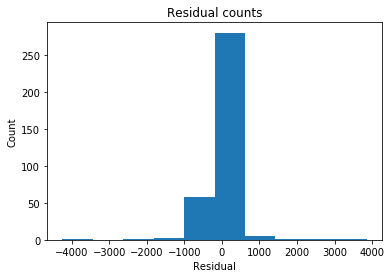

In [48]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['Property\ncrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

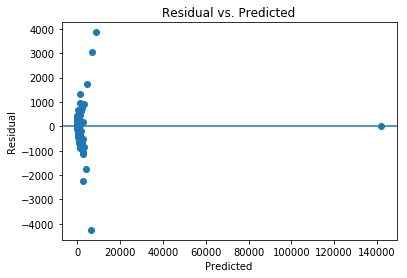

In [49]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()